# Reading the CSV file

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Reading the CSV file
df = pd.read_csv('./3.calculate_combin_pdpf.csv')

# Splitting the dataframe based on the given angle criteria
# South-North direction
south_north = df[(0 < df['north_angle']) & (df['north_angle'] < 30) |
                 (150 < df['north_angle']) & (df['north_angle'] < 210) |
                 (330 < df['north_angle']) & (df['north_angle'] < 360)]

# East-West direction
east_west = df[(60 < df['north_angle']) & (df['north_angle'] < 120) |
               (240 < df['north_angle']) & (df['north_angle'] < 300)]

south_north_count = len(south_north)
east_west_count = len(east_west)

# 分析不同朝向太阳辐射在地理位置上的差异

## 箱线图

/var/folders/9f/lczvn2yj5xq7blvk6mz2y_lh0000gn/T/ipykernel_45534/384624571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_north['direction'] = 'South-North'
/var/folders/9f/lczvn2yj5xq7blvk6mz2y_lh0000gn/T/ipykernel_45534/384624571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_west['direction'] = 'East-West'


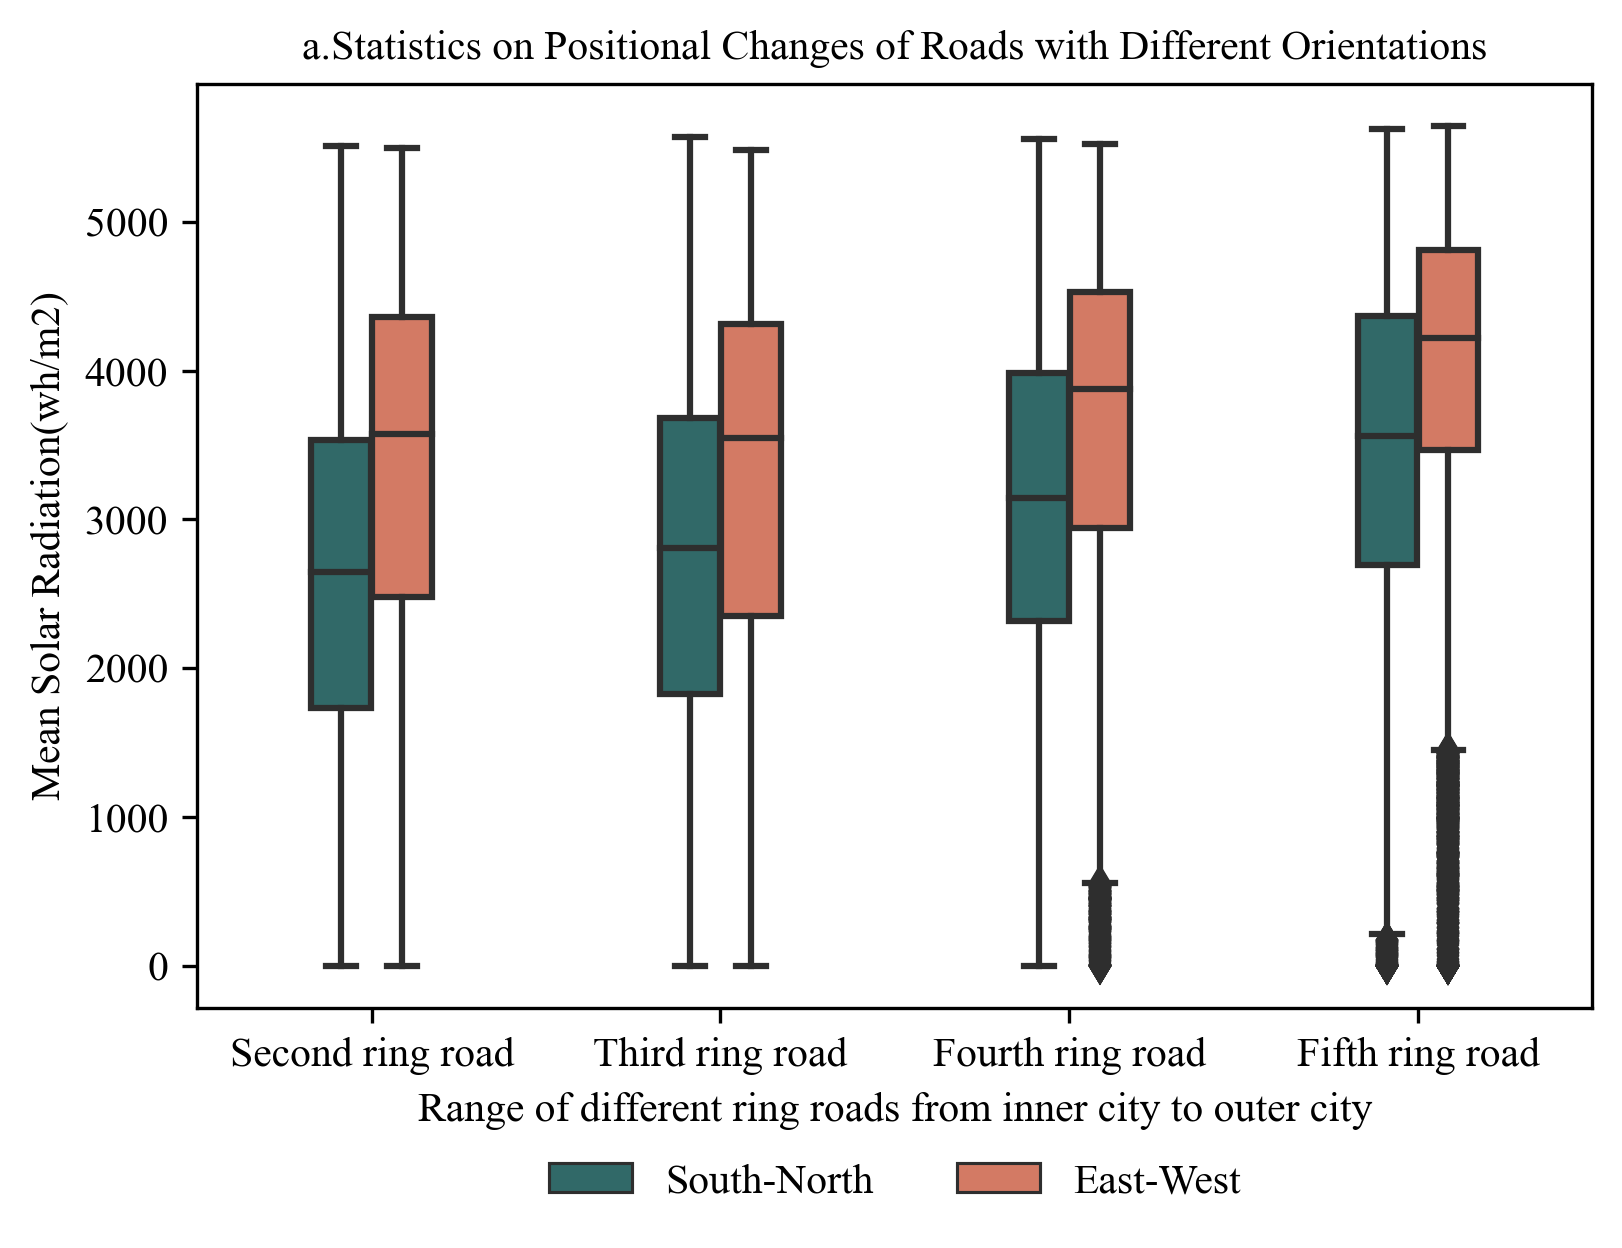

In [6]:
# 添加一个表示方向的列
south_north['direction'] = 'South-North'
east_west['direction'] = 'East-West'

# 合并两个数据框
merged_df = pd.concat([south_north, east_west])

# 创建箱线图
plt.figure(figsize=(6, 4),dpi=300)
sns.boxplot(x="circle", y="soalr_radiation", hue="direction", data=merged_df, palette={"South-North": "#287271", "East-West": "#e66f51"}, width=0.35)
plt.title("a.Statistics on Positional Changes of Roads with Different Orientations", fontsize=10)
plt.ylabel("Mean Solar Radiation(wh/m2)")
plt.xlabel("Range of different ring roads from inner city to outer city")

# 设置自定义x轴标签
custom_labels = ["Second ring road", "Third ring road", "Fourth ring road", "Fifth ring road"]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

# 设置图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25), title=None, frameon=False)

plt.show()


## 折线拟合图

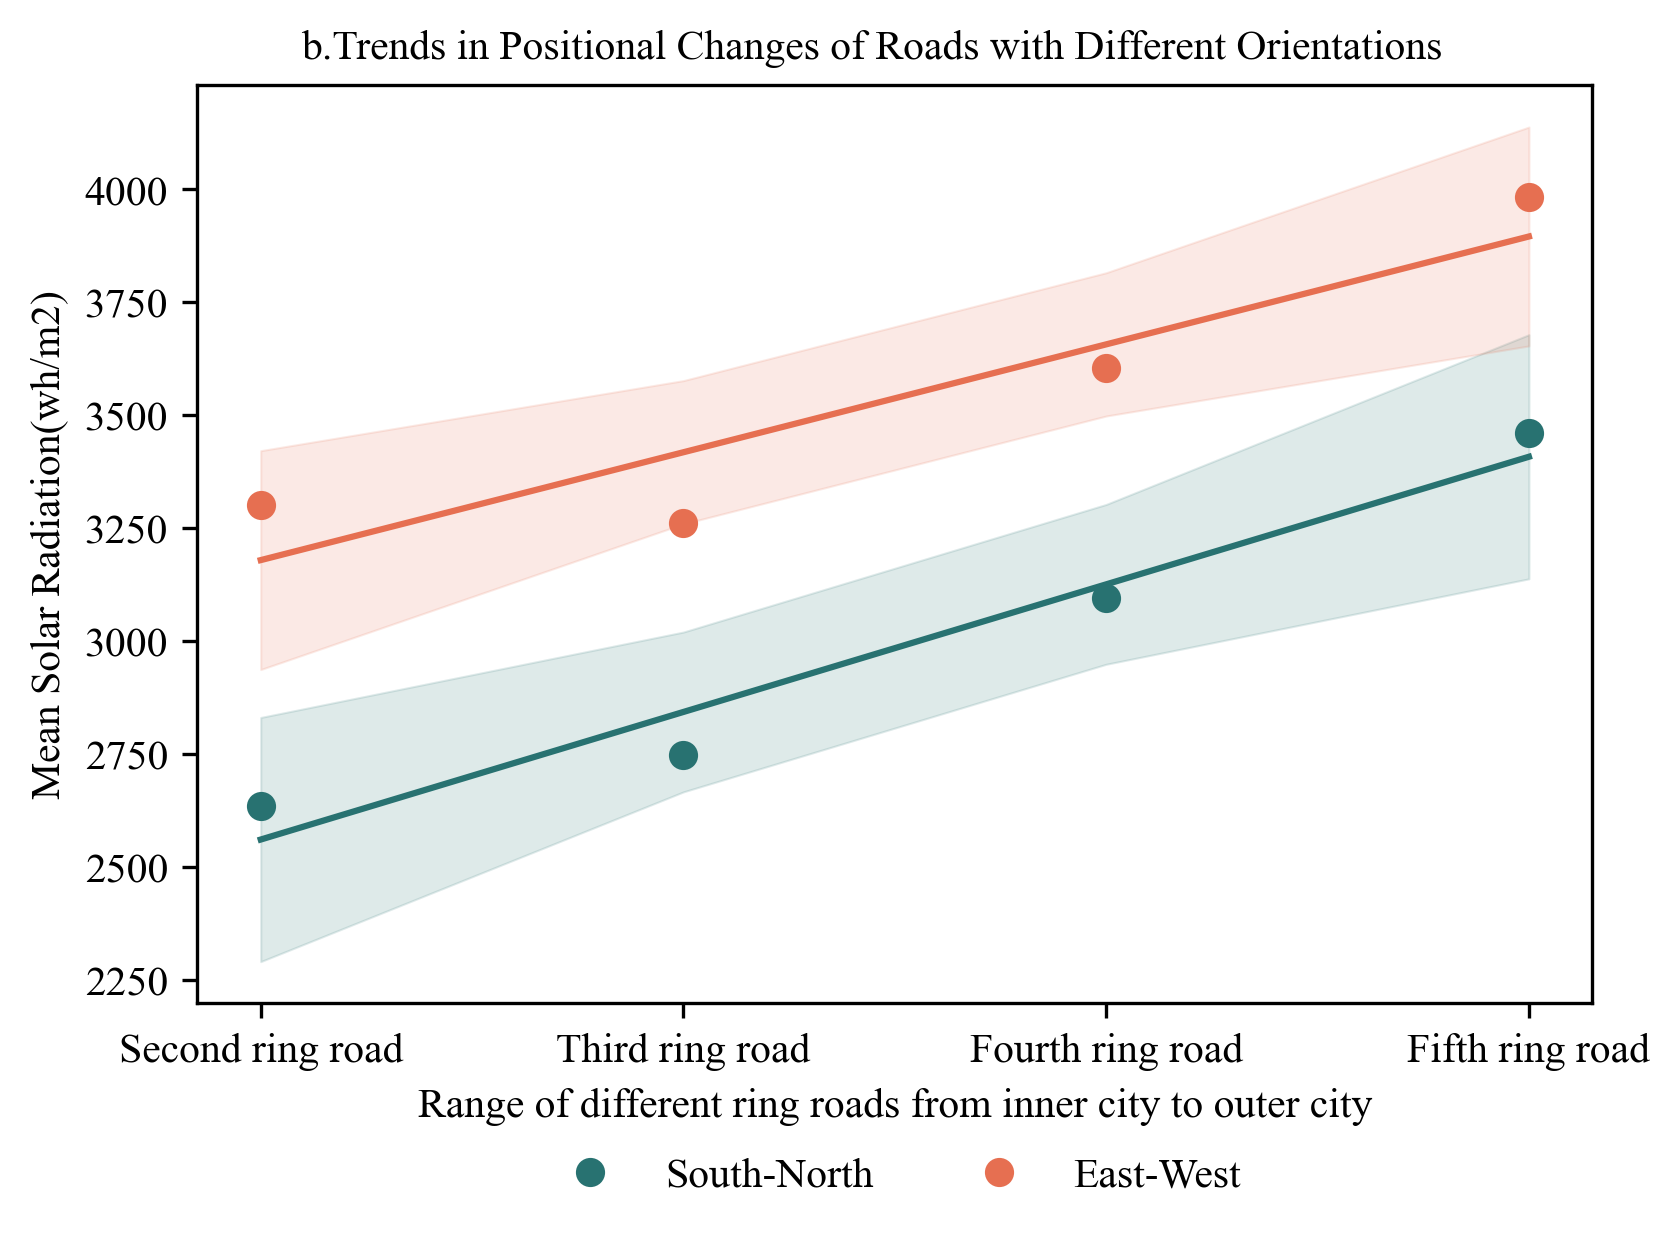

In [7]:
# 为south_north和east_west方向提取数据
x_sn = south_north['circle'].unique()
x_sn.sort()
y_sn = [south_north[south_north['circle'] == i]['soalr_radiation'].mean() for i in x_sn]

x_ew = east_west['circle'].unique()
x_ew.sort()
y_ew = [east_west[east_west['circle'] == i]['soalr_radiation'].mean() for i in x_ew]

# 绘图设置
fig, ax = plt.subplots(figsize=(6,4.5), dpi=300)
plt.style.use('ggplot')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# 设置坐标轴标签
ax.set_xlabel('Range of different ring roads from inner city to outer city', fontsize=10, color='black')
ax.set_ylabel('Mean Solar Radiation(wh/m2)', fontsize=10, color='black')
ax.tick_params(axis='both', colors='black')

# 为south_north方向进行多项式拟合并绘图
a_sn, b_sn = np.polyfit(x_sn, y_sn, deg=1)
y_est_sn = a_sn * x_sn + b_sn
y_err_sn = np.std(y_sn) * np.sqrt(1/len(x_sn) + (x_sn - x_sn.mean())**2 / np.sum((x_sn - x_sn.mean())**2))
ax.plot(x_sn, y_est_sn, '-', color='#287271')
ax.fill_between(x_sn, y_est_sn - y_err_sn, y_est_sn + y_err_sn, color='#287271', alpha=0.15)
ax.plot(x_sn, y_sn, 'o', color='#287271', label='South-North')

# 为east_west方向进行多项式拟合并绘图
a_ew, b_ew = np.polyfit(x_ew, y_ew, deg=1)
y_est_ew = a_ew * x_ew + b_ew
y_err_ew = np.std(y_ew) * np.sqrt(1/len(x_ew) + (x_ew - x_ew.mean())**2 / np.sum((x_ew - x_ew.mean())**2))
ax.plot(x_ew, y_est_ew, '-', color='#e66f51')
ax.fill_between(x_ew, y_est_ew - y_err_ew, y_est_ew + y_err_ew, color='#e66f51', alpha=0.15)
ax.plot(x_ew, y_ew, 'o', color='#e66f51', label='East-West')

# 设置x轴刻度标签和图例
x_labels = ["Second ring road", "Third ring road", "Fourth ring road", "Fifth ring road"]
plt.xticks(x_sn, x_labels, rotation = 0)  # 使用x_sn作为刻度

# 设置图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25), title=None, frameon=False)

# 设置标题
plt.figtext(0.5, 0.9, "b.Trends in Positional Changes of Roads with Different Orientations", ha="center", fontsize=10)

# 调整布局
plt.subplots_adjust(bottom=0.2)

plt.show()


# 分析不同朝向太阳辐射在时间月份上的差异

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Reading the CSV file
df = pd.read_csv('./3.calculate_combin_pdpf.csv')

# Splitting the dataframe based on the given angle criteria
# South-North direction
south_north = df[(0 < df['north_angle']) & (df['north_angle'] < 30) |
                 (150 < df['north_angle']) & (df['north_angle'] < 210) |
                 (330 < df['north_angle']) & (df['north_angle'] < 360)]

# East-West direction
east_west = df[(60 < df['north_angle']) & (df['north_angle'] < 120) |
               (240 < df['north_angle']) & (df['north_angle'] < 300)]

south_north_count = len(south_north)
east_west_count = len(east_west)

## 箱线图

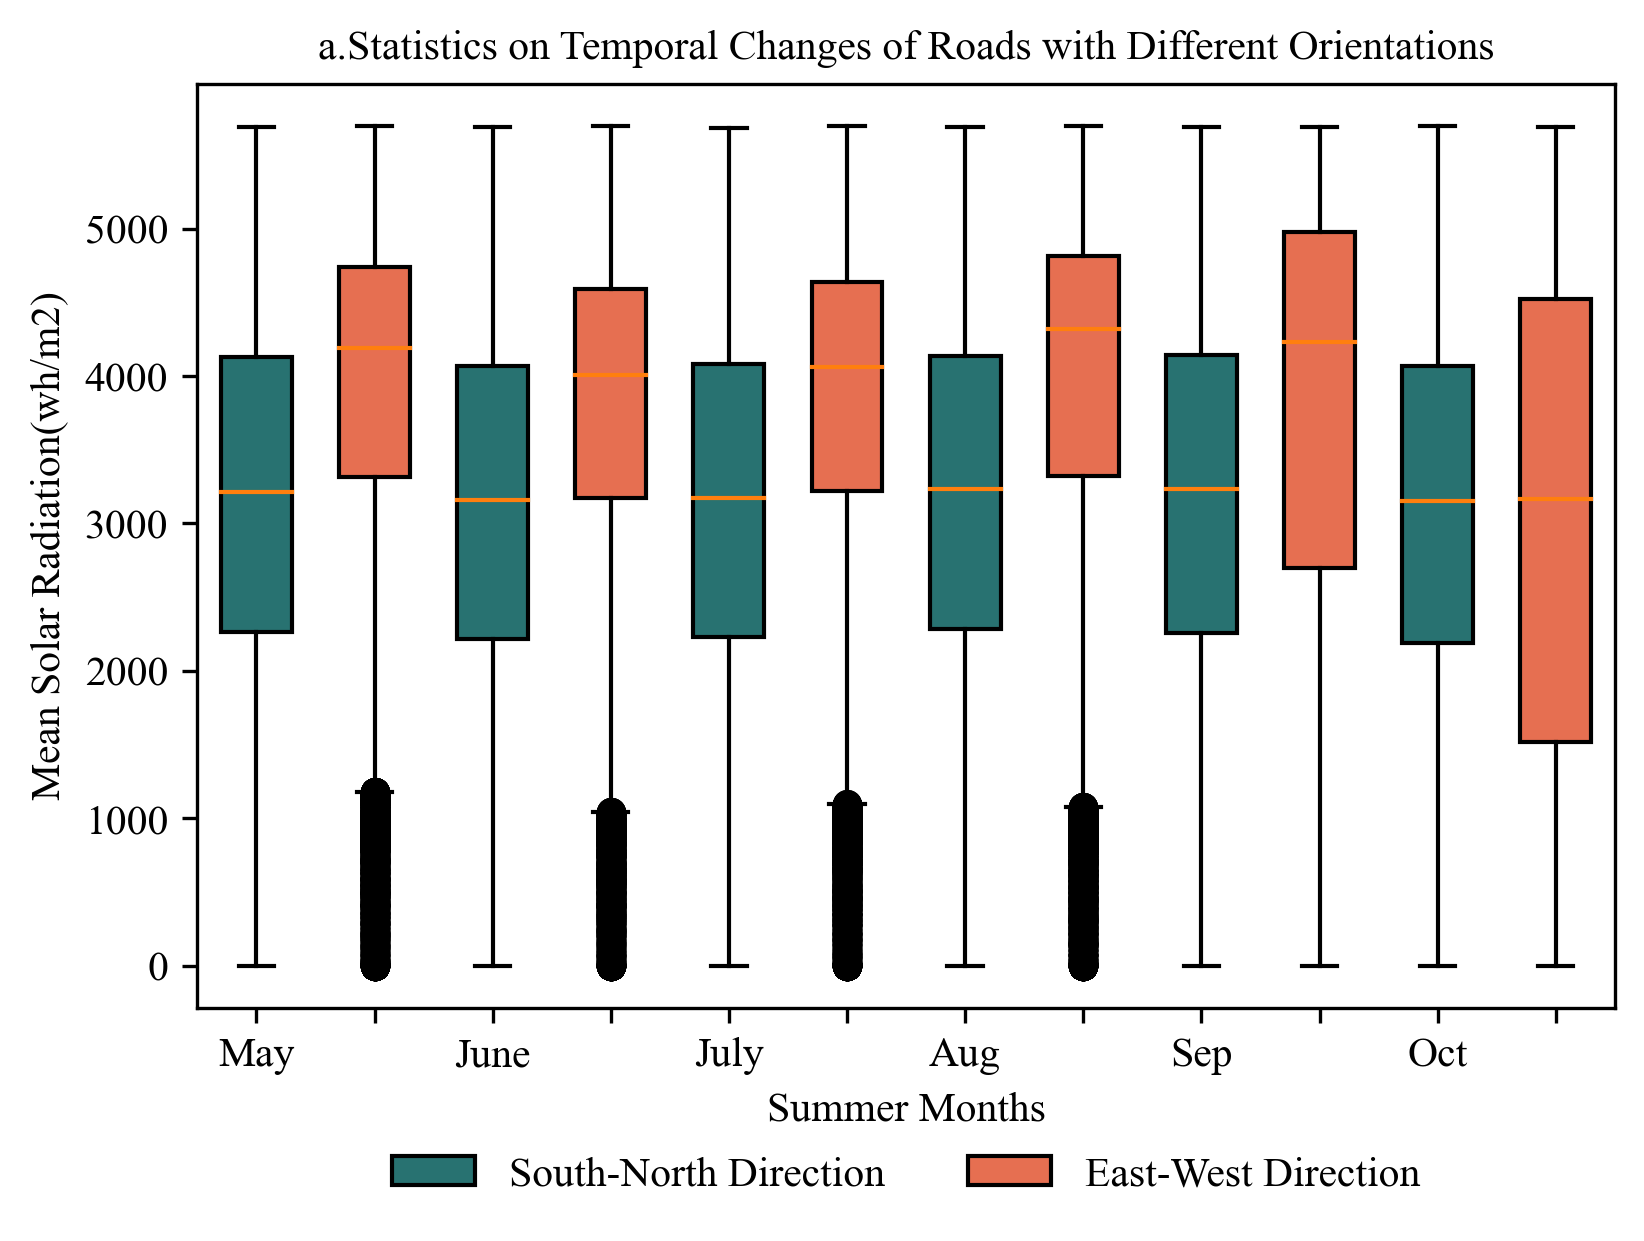

In [2]:
# Extracting the mean values of PDPF_5 to PDPF_10 for the south_north direction
pdpf_columns = ['PDPF_5', 'PDPF_6', 'PDPF_7', 'PDPF_8', 'PDPF_9', 'PDPF_10']

# 提取并重塑南北和东西方向的数据
south_north_data = south_north[pdpf_columns + ['FID']].melt(id_vars=['FID'], var_name='Month', value_name='Value')
east_west_data = east_west[pdpf_columns + ['FID']].melt(id_vars=['FID'], var_name='Month', value_name='Value')

# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
fig.subplots_adjust(right=0.8)

# 设置x轴
label = ['May', 'June', 'July', 'Aug', 'Sep', 'Oct']

# 绘制箱线图
bplot1 = ax.boxplot([south_north_data[south_north_data['Month'] == month]['Value'] for month in pdpf_columns],
                    positions=range(0, len(pdpf_columns) * 2, 2), widths=0.6, patch_artist=True, boxprops=dict(facecolor='#287271'), labels=label)

bplot2 = ax.boxplot([east_west_data[east_west_data['Month'] == month]['Value'] for month in pdpf_columns],
                    positions=range(1, len(pdpf_columns) * 2 + 1, 2), widths=0.6, patch_artist=True, boxprops=dict(facecolor='#e66f51'),labels=['']*len(pdpf_columns))

# 设置标题和轴标签
ax.set_title('a.Statistics on Temporal Changes of Roads with Different Orientations',fontsize=10)
ax.set_xlabel('Summer Months')
ax.set_ylabel('Mean Solar Radiation(wh/m2)')

# 添加图例
legend = plt.legend([bplot1['boxes'][0], bplot2['boxes'][0]], ['South-North Direction', 'East-West Direction'], 
                    loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

plt.show()


## 均值+一元二次拟合

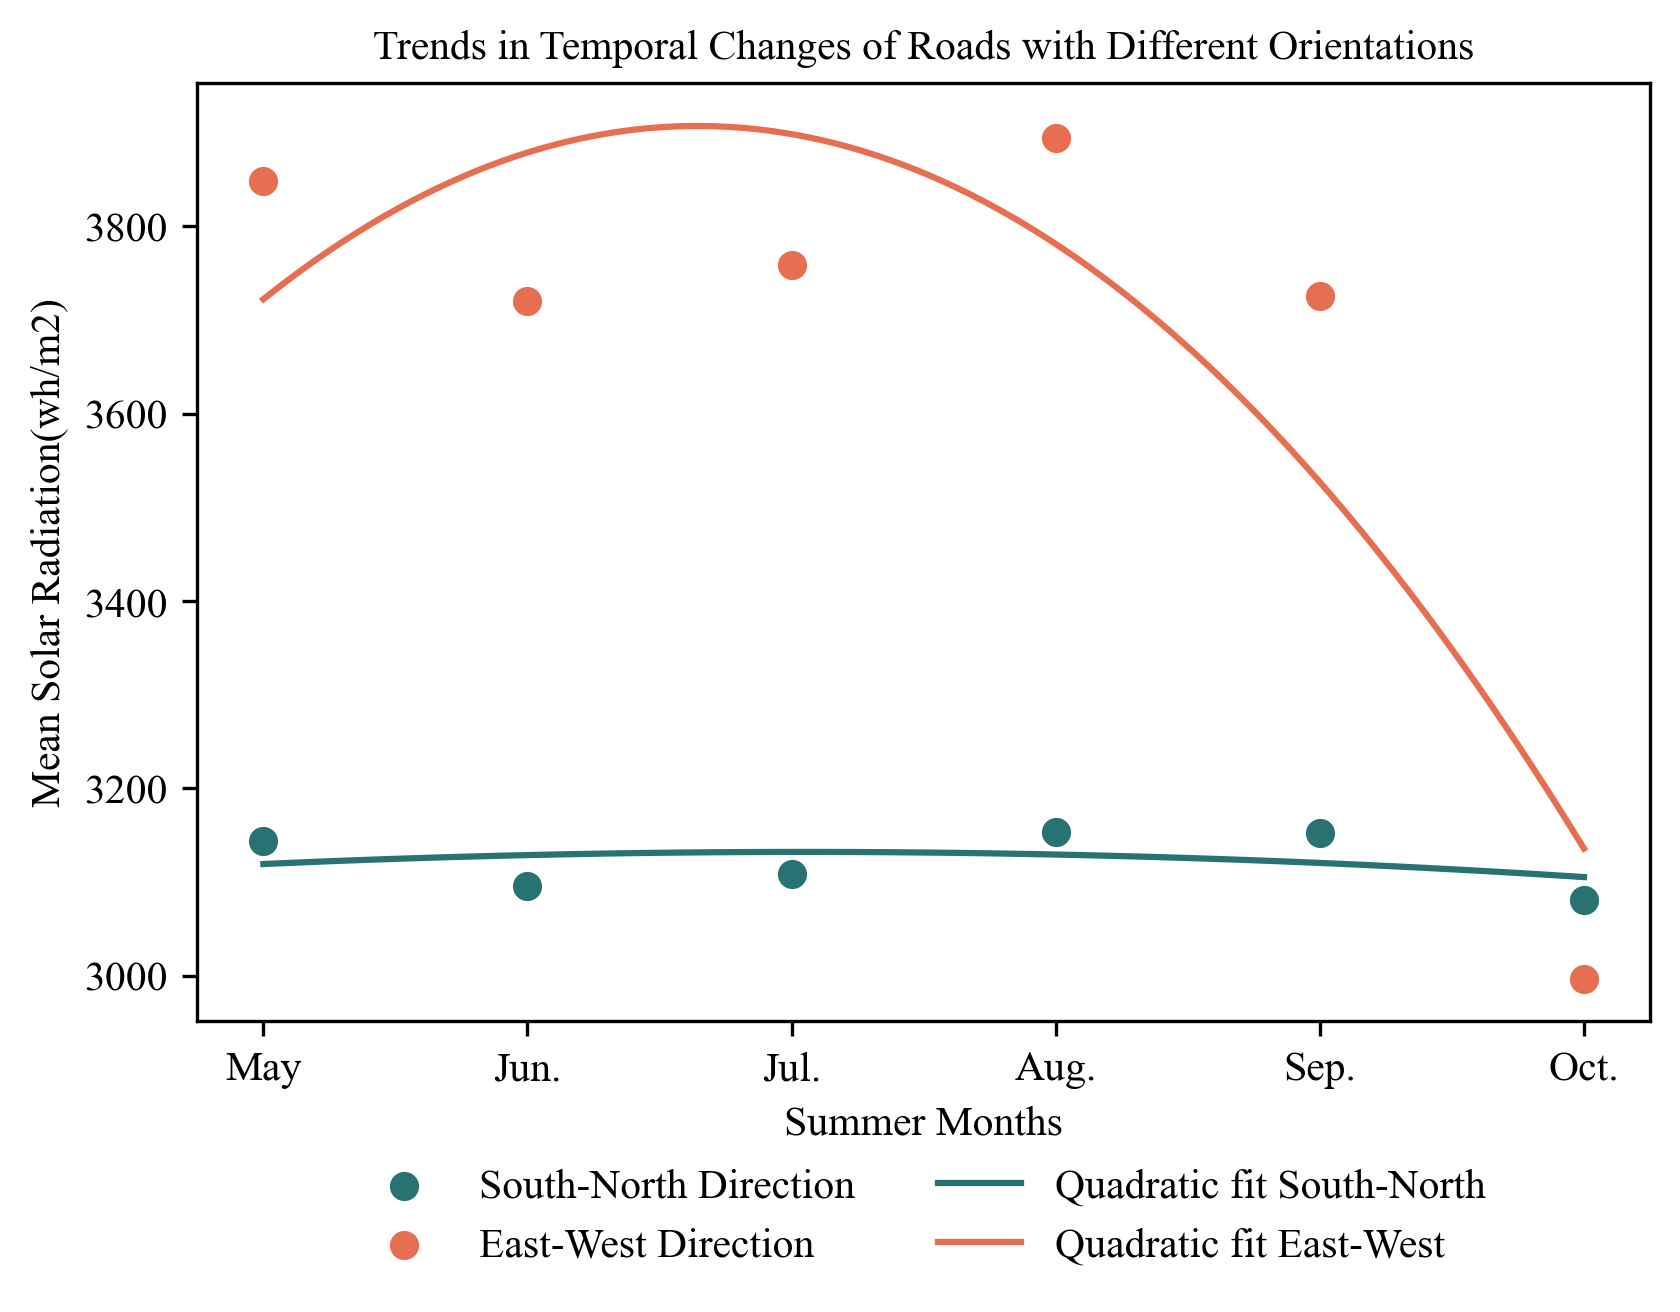

In [3]:
# Extracting the mean values of PDPF_5 to PDPF_10 for the south_north direction
pdpf_columns = ['PDPF_5', 'PDPF_6', 'PDPF_7', 'PDPF_8', 'PDPF_9', 'PDPF_10']

# 提取南北和东西方向的PDPF_5到PDPF_10的平均值
mean_values_south_north = south_north[pdpf_columns].mean().values
mean_values_east_west = east_west[pdpf_columns].mean().values

# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(5.7, 4.6), dpi=300)

# 创建x轴数据
x_data = np.arange(6)

# 绘制散点图
plt.scatter(x_data, mean_values_south_north, color='#287271', label='South-North Direction')
plt.scatter(x_data, mean_values_east_west, color='#e66f51', label='East-West Direction')

# 一元二次拟合
coeffs_south_north = np.polyfit(x_data, mean_values_south_north, 2)
fit_function_south_north = np.poly1d(coeffs_south_north)

coeffs_east_west = np.polyfit(x_data, mean_values_east_west, 2)
fit_function_east_west = np.poly1d(coeffs_east_west)

# 创建拟合线的x轴数据
x_fit = np.linspace(x_data[0], x_data[-1], 100)
y_fit_south_north = fit_function_south_north(x_fit)
y_fit_east_west = fit_function_east_west(x_fit)

# 绘制拟合线
plt.plot(x_fit, y_fit_south_north, '#287271', label='Quadratic fit South-North')
plt.plot(x_fit, y_fit_east_west, '#e66f51', label='Quadratic fit East-West')

# 设置x轴刻度标签
x_labels = ['May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.']
plt.xticks(x_data, x_labels)

# 设置图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.3), title=None, frameon=False)

# 设置轴标签和标题
plt.xlabel('Summer Months')
plt.ylabel('Mean Solar Radiation(wh/m2)')
plt.title('Trends in Temporal Changes of Roads with Different Orientations',fontsize=10)

# 显示图
plt.tight_layout()
plt.show()
